# **- Import Libraries**

> In this step we will import all the required libraries that will be neccessary for this A.I model Project.
> Some Commonly used Python Libraries for AI/ML and Data Science are:
>> - Numpy
>> - Pandas
>> - Seaborn
>> - MatPlotLib
>> - Plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
data = pd.read_csv("/content/drive/My Drive/Data Sets/SocialMedia-MentalHealth.csv")

In [7]:
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [8]:
data.size,data.shape

(10101, (481, 21))

# **- Data Cleansing**
> In this step, identifying and correcting errors, inconsistencies, and inaccuracies in a dataset takes place.

In [42]:
data.set_axis(['TimeStamp','Age','Sex','Relationship Status','Occupation','Affiliations','Uses Social Media?','Platforms','Time Spent','ADHD Q1','ADHD Q2','Anxiety Q1','ADHD Q3','Anxiety Q2','ADHD Q4','Self Esteem Q1','Self Esteem Q2','Self Esteem Q3','Depression Q1','Depression Q2','Depression Q3'],axis='columns',inplace=True)

In [17]:
data.columns

Index(['TimeStamp', 'Age', 'Sex', 'Relationship Status', 'Occupation',
       'Affiliations', 'Uses Social Media?', 'Platforms', 'Time Spent',
       'ADHD Q1', 'ADHD Q2', 'Anxiety Q1', 'ADHD Q3', 'Anxiety Q2', 'ADHD Q4',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3'],
      dtype='object')

In [43]:
titles = list(data.columns)
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = data[titles]
titles

['TimeStamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Uses Social Media?',
 'Platforms',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

Checking And Resolving Null Values
>Null Values In the data can cause some errors, so it is advised to either remove them or convert them.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TimeStamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Uses Social Media?   481 non-null    object 
 7   Platforms            481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   ADHD Q1              481 non-null    int64  
 10  ADHD Q2              481 non-null    int64  
 11  ADHD Q3              481 non-null    int64  
 12  ADHD Q4              481 non-null    int64  
 13  Anxiety Q1           481 non-null    int64  
 14  Anxiety Q2           481 non-null    int64  
 15  Self Esteem Q1       481 non-null    int

>There are no missing values in this dataset, **'** Affiliations **'** columns contain some null values

In [44]:
Genders = set(data['Sex'])
print(Genders)

{'Non binary ', 'Nonbinary ', 'Non-binary', 'Male', 'Trans', 'NB', 'Female', 'unsure ', 'There are others???'}


These Values for gender need to be fixed.

In [45]:
data.drop(data.loc[data['Sex'] =='There are others???'].index, inplace=True)

In [46]:
#Combining the unique entries that all fall under the "Others" category
data.replace('Non-binary','Others', inplace=True)
data.replace('Nonbinary ','Others', inplace=True)
data.replace('NB','Others', inplace=True)
data.replace('unsure ','Others', inplace=True)
data.replace('Non binary ','Others', inplace=True)
data.replace('Trans','Others', inplace=True)

In [47]:
Genders = set(data['Sex'])
print(Genders)

{'Male', 'Female', 'Others'}


The Gender column is now fixed.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TimeStamp            480 non-null    object 
 1   Age                  480 non-null    float64
 2   Sex                  480 non-null    object 
 3   Relationship Status  480 non-null    object 
 4   Occupation           480 non-null    object 
 5   Affiliations         450 non-null    object 
 6   Uses Social Media?   480 non-null    object 
 7   Platforms            480 non-null    object 
 8   Time Spent           480 non-null    object 
 9   ADHD Q1              480 non-null    int64  
 10  ADHD Q2              480 non-null    int64  
 11  ADHD Q3              480 non-null    int64  
 12  ADHD Q4              480 non-null    int64  
 13  Anxiety Q1           480 non-null    int64  
 14  Anxiety Q2           480 non-null    int64  
 15  Self Esteem Q1       480 non-null    int

In [48]:
data['Age'] = data['Age'].astype('int64')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TimeStamp            480 non-null    object
 1   Age                  480 non-null    int64 
 2   Sex                  480 non-null    object
 3   Relationship Status  480 non-null    object
 4   Occupation           480 non-null    object
 5   Affiliations         450 non-null    object
 6   Uses Social Media?   480 non-null    object
 7   Platforms            480 non-null    object
 8   Time Spent           480 non-null    object
 9   ADHD Q1              480 non-null    int64 
 10  ADHD Q2              480 non-null    int64 
 11  ADHD Q3              480 non-null    int64 
 12  ADHD Q4              480 non-null    int64 
 13  Anxiety Q1           480 non-null    int64 
 14  Anxiety Q2           480 non-null    int64 
 15  Self Esteem Q1       480 non-null    int64 
 16  Self Est

In [33]:
data.describe()

,Age,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,26.143750,3.552083,3.316667,3.345833,3.245833,2.583333,3.564583,2.831250,2.772917,2.456250,3.260417,3.172917,3.206250
std,9.923621,1.097252,1.327300,1.174353,1.348464,1.253527,1.279351,1.409283,1.056097,1.248867,1.310347,1.256838,1.459675
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [49]:
data.median(numeric_only=True)

Age               22.0
ADHD Q1            4.0
ADHD Q2            3.0
ADHD Q3            3.0
ADHD Q4            3.0
Anxiety Q1         2.0
Anxiety Q2         4.0
Self Esteem Q1     3.0
Self Esteem Q2     3.0
Self Esteem Q3     2.0
Depression Q1      3.0
Depression Q2      3.0
Depression Q3      3.0
dtype: float64

For The question columns there values must be converted to integers also.The Scores represented in the columns are as follows:
>Very Negative - 1

>Slightly Negative - 2

>Neutral - 3

>Slightly Positive - 4

>Very Positive - 5

For This project we are trying to calculate the negative affect of social media so for neutral, slightly positive, very positive there mental health is fine so there scores must be adjusted.New Scores:
>Very negative - 4

>Slightly negative - 2

>Neutral - 0

>Slightly Positive - 0

>Very Positive - 0

In [50]:
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 0


data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 2

In [40]:
data.head(5)

,TimeStamp,Age,Sex,Relationship Status,Occupation,Affiliations,Uses Social Media?,Platforms,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,4,14,40
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,10,14,46
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,4,11,32
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,12,6,11,9,38
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,6,9,41


**Handling Different Q. Blocks**

One of the requirements for this research to be valid is to calculate the total number of points accrued by the different questions on various aspects of mental health and wellbeing.

Questions measure 4 aspects of mental wellbeing -


1.   Attention Deficit Hyperactivity Disorder (ADHD)
2.   Anxiety
3.   Self Esteem
4.   Depression

In [51]:
ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data['ADHD Score'] = data[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data['Anxiety Score'] = data[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
data['Depression Score'] = data[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score','Self Esteem Score','Depression Score']
data['Total Score'] = data[Total].sum(axis=1)


data.drop(data.iloc[:, 9:21], inplace = True, axis = 1)
data.drop(['TimeStamp'], inplace = True, axis = 1)

In [52]:
data.head(5)


,Age,Sex,Relationship Status,Occupation,Affiliations,Uses Social Media?,Platforms,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,4,14,40
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,10,14,46
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,4,11,32
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,12,6,11,9,38
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,6,9,41


**Summarizing Total Score Column**

An Outcome of 0 means that individual is not confirmed to be experiencing severe mental health symptoms. Therefore we do not think the individual needs to go to get a mental health check up.

An Outcome of 1 means that the individual definitely experiencing some severe negative symptoms of mental health. They are recommended to go to get a mental health check up.

In [53]:
def map_score(score):
  if score < 40:
    return "0"
  elif score >= 40:
    return "1"

data['Outcome']= data['Total Score'].apply(lambda score: map_score(score))
data['Outcome'] = data['Outcome'].astype('int64')

In [55]:
data.shape

(480, 14)

In [56]:
data.describe()

,Age,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,26.143750,13.460417,6.147917,6.266667,9.639583,35.514583,0.370833
std,9.923621,3.898302,2.087090,2.759635,3.104528,9.274507,0.483532
min,13.000000,4.000000,2.000000,2.000000,3.000000,14.000000,0.000000
25%,21.000000,11.000000,5.000000,4.000000,7.750000,29.000000,0.000000
50%,22.000000,14.000000,6.000000,6.000000,10.000000,36.000000,0.000000
75%,26.000000,16.000000,8.000000,8.000000,12.000000,42.000000,1.000000
max,91.000000,20.000000,10.000000,14.000000,15.000000,58.000000,1.000000


# **- Data Visualization**
>It is the process of representing data graphically to gain insights, identify patterns, and communicate information effectively.

>It can be a powerful tool for data analysis and communication, as it can simplify complex information in decision-making, and help detect patterns and trends that may not be apparent in raw data. It allows for a more intuitive understanding of the data.

[]

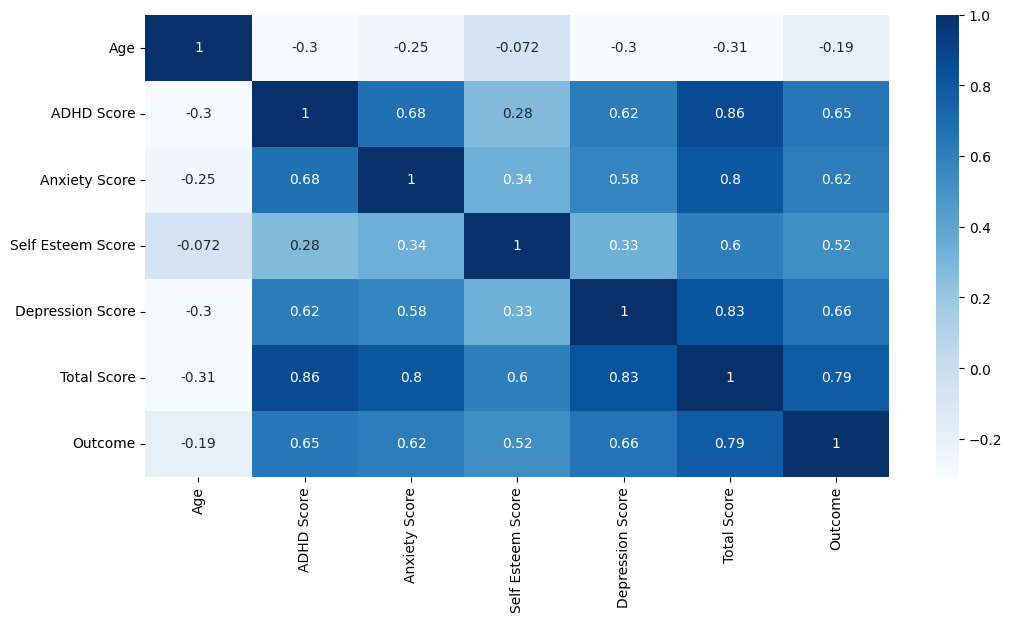

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

<Axes: xlabel='Time Spent on Social Media', ylabel='Frequency'>

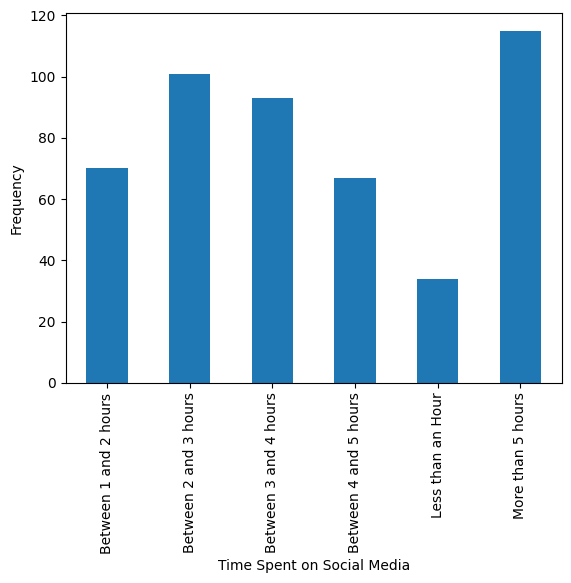

In [59]:
data.groupby('Time Spent').size().plot.bar(xlabel='Time Spent on Social Media', ylabel='Frequency')

In [61]:
fig = px.pie(data,values='Outcome', names='Sex', title='Mental Fitness Outcome by Gender')
fig.show()

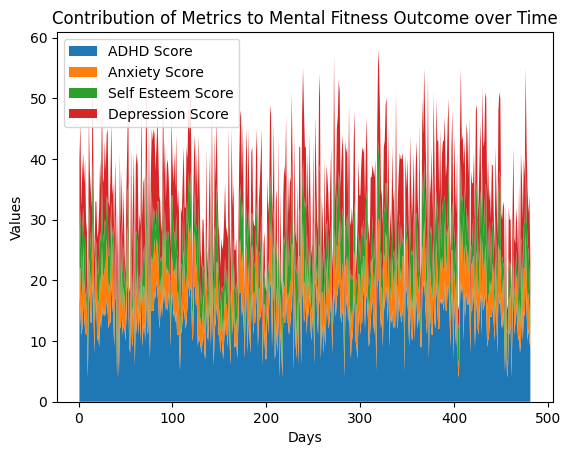

In [62]:
metrics = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score']
plt.stackplot(data.index + 1, [data[metric] for metric in metrics], labels=metrics)
plt.xlabel('Days')
plt.ylabel('Values')
plt.title('Contribution of Metrics to Mental Fitness Outcome over Time')
plt.legend(loc='upper left')
plt.show()

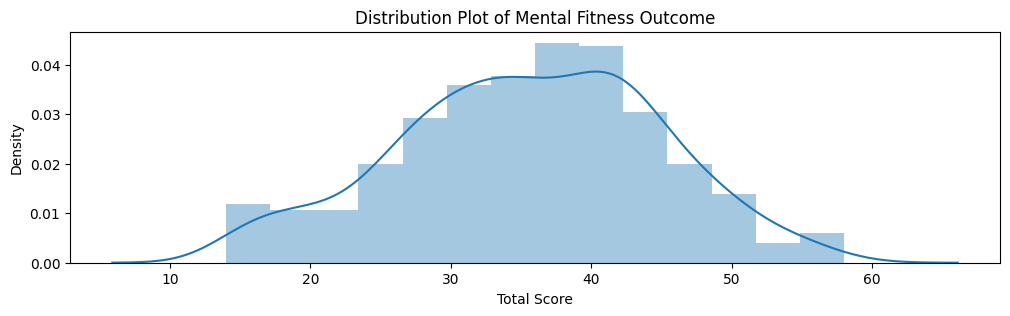

In [66]:
plt.figure(figsize = (12, 3))
sns.distplot(data['Total Score'])
plt.title('Distribution Plot of Mental Fitness Outcome')
plt.show()

**Converting Time Spent category to Numerical Values**

This can be done by assigning the various 'Time Spent' groups to number based strings, and then converting the whole column from object type to int64.

>'Less than an Hour' = 0

>'Between 1 and 2 hours' = 1

>'Between 2 and 3 hours' = 2

>'Between 3 and 4 hours' = 3

>'Between 4 and 5 hours' = 4

>'More than 5 hours' = 5

In [67]:
data.loc[data['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
data.loc[data['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
data.loc[data['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
data.loc[data['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
data.loc[data['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
data.loc[data['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5

In [68]:
data['Time Spent'] = data['Time Spent'].astype('int64')

we should also convert gender to nunerical values for the model training.

In [69]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Others', 'Sex'] = 2
data['Sex'] = data['Sex'].astype('int64')

In [71]:
data.head(5)

,Age,Sex,Relationship Status,Occupation,Affiliations,Uses Social Media?,Platforms,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,18,4,4,14,40,1
1,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,15,7,10,14,46,1
2,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,11,6,4,11,32,0
3,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,12,6,11,9,38,0
4,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,17,9,6,9,41,1


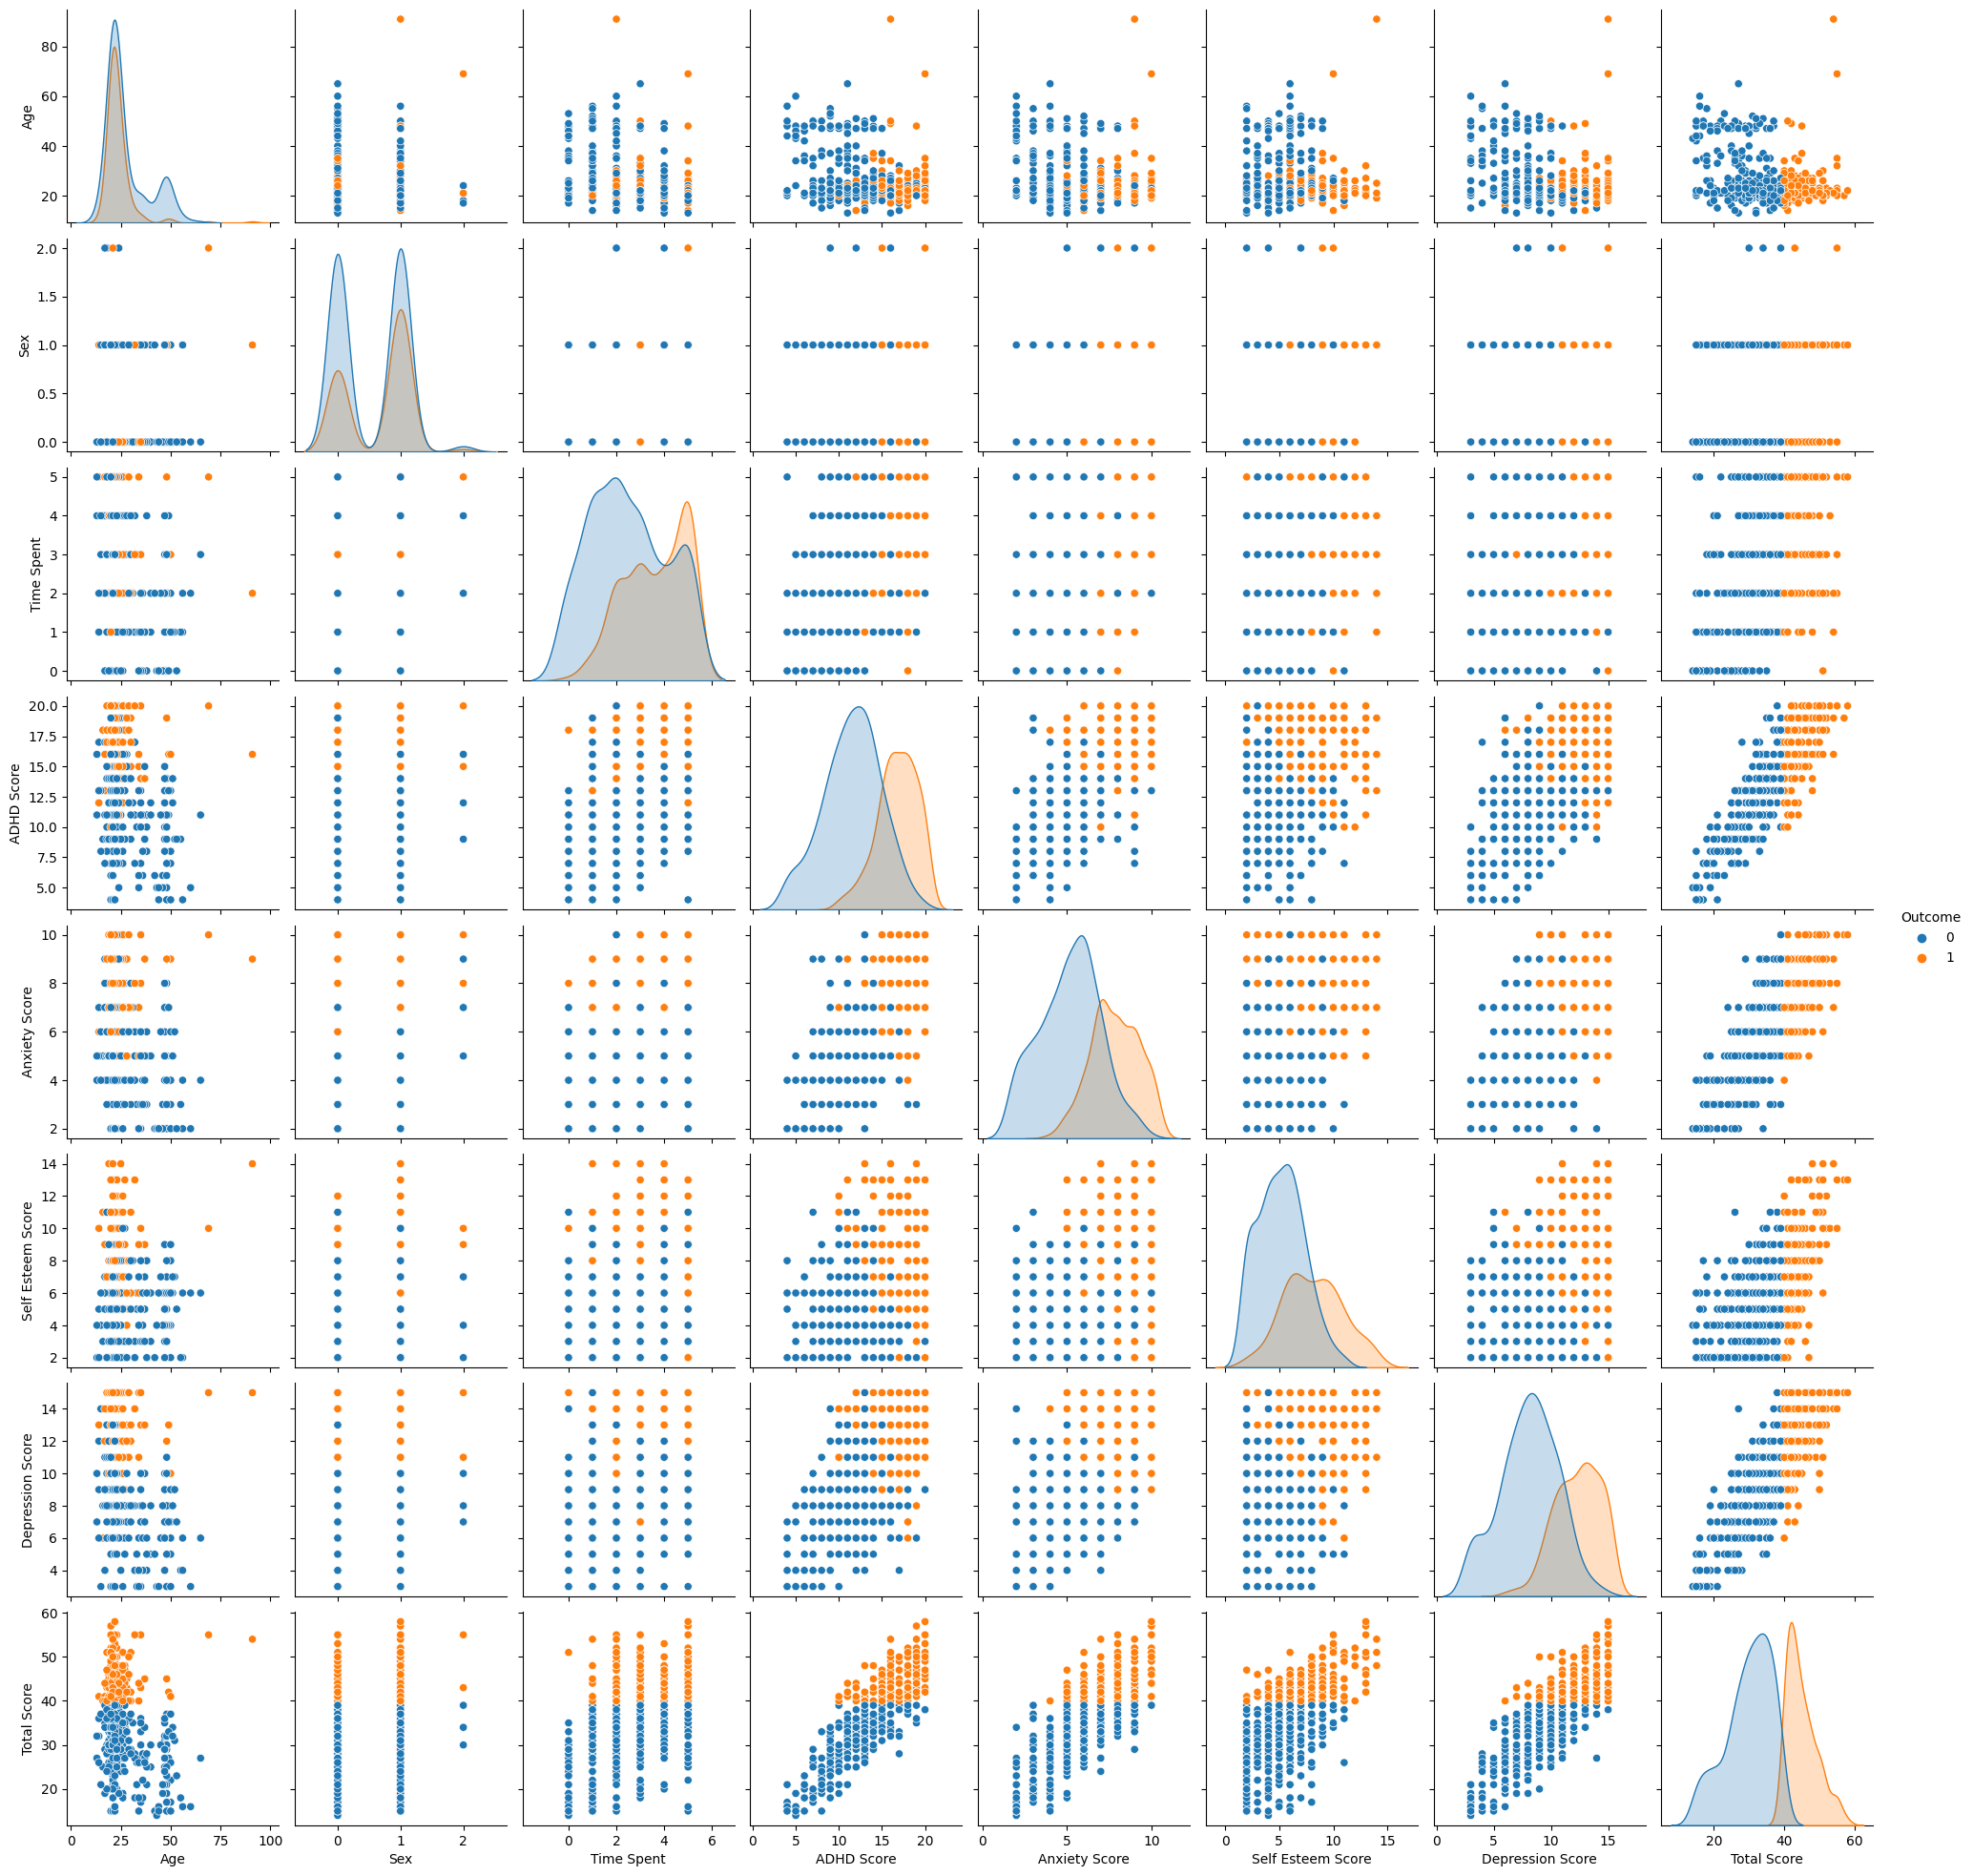

In [72]:
sns.pairplot(data,hue='Outcome',diag_kind='kde')

# **- Model Training**
>It is the step where a model learns from the provided data to make predictions or make decisions on unseen data.

>In this step, we will first test the model on trained data and then on testing data

>In this project we've used two regression models:
>>Linear Regression

>>Random Forest Regression

# Droping non-required columns

First off, let us drop unneeded categorical columns before we feed our dataset to the training model.

In [73]:
data.drop(data.iloc[:, 2:7], inplace = True, axis = 1)

In [75]:
data.head()

,Age,Sex,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,2,18,4,4,14,40,1
1,21,1,5,15,7,10,14,46,1
2,21,1,3,11,6,4,11,32,0
3,21,1,5,12,6,11,9,38,0
4,21,1,2,17,9,6,9,41,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 480
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                480 non-null    int64
 1   Sex                480 non-null    int64
 2   Time Spent         480 non-null    int64
 3   ADHD Score         480 non-null    int64
 4   Anxiety Score      480 non-null    int64
 5   Self Esteem Score  480 non-null    int64
 6   Depression Score   480 non-null    int64
 7   Total Score        480 non-null    int64
 8   Outcome            480 non-null    int64
dtypes: int64(9)
memory usage: 37.5 KB


In [77]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.15,random_state=2)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("\ny_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (408, 8)
x_test : (72, 8)

y_train : (408,)
y_test : (72,)


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_train)

mse = mean_squared_error(y_train,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_train,y_pred)

print("The Linear Regression model performance for training set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))

The Linear Regression model performance for training set
<------------------------------------------------------>
MSE is {} 0.09041096437835329
RMSE is {} 0.3006841605045954
R2 score is {} 0.6111066983390645


In [90]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_train)

mse = mean_squared_error(y_train,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_train,y_pred)

print("The Random Forest Regressor model performance for training set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))

The Random Forest Regressor model performance for training set
<------------------------------------------------------>
MSE is {} 0.0
RMSE is {} 0.0
R2 score is {} 1.0


In [91]:
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_test,y_pred)

print("The Linear Regression model performance for testing set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))

The Linear Regression model performance for testing set
<------------------------------------------------------>
MSE is {} 0.07217464747649362
RMSE is {} 0.2686533965474727
R2 score is {} 0.6963040807482607


In [92]:
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_test,y_pred)

print("\nThe Random Forest Regressor model performance for testing set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))


The Random Forest Regressor model performance for testing set
<------------------------------------------------------>
MSE is {} 0.0
RMSE is {} 0.0
R2 score is {} 1.0
